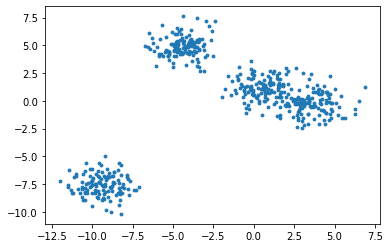

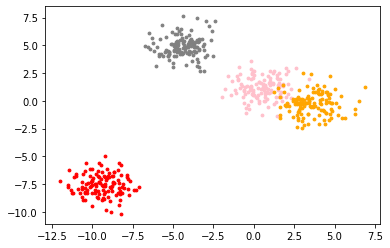

In [1]:

from sklearn.datasets import make_blobs  #make_blobs聚类数据生成器
import matplotlib.pyplot as plt

#自己创建数据集

X, y = make_blobs(n_samples=500,n_features=2,centers=4,random_state=1912)

fig, ax1 = plt.subplots(1)
ax1.scatter(X[:, 0], X[:, 1]#.scatter散点图
            ,marker='o' #点的形状
            ,s=8 #点的大小
           )
plt.show()


#点的真实分布

color = ["red","pink","orange","gray"]
fig, ax1 = plt.subplots(1)

for i in range(4):
    ax1.scatter(X[y==i, 0], X[y==i, 1]
            ,marker='o' #点的形状
            ,s=8        #点的大小
            ,c=color[i]
           )
plt.show()


In [2]:
X.shape

(500, 2)

In [3]:
X

array([[-9.23827241e+00, -8.20366969e+00],
       [-9.22739486e+00, -7.68856809e+00],
       [-3.67550909e+00,  5.31349515e+00],
       [-7.40926641e+00, -8.05469598e+00],
       [-4.01358135e+00,  4.21206806e+00],
       [ 1.93284287e+00, -3.77780867e-01],
       [-3.88473429e+00,  4.93954584e+00],
       [ 4.43479585e+00, -2.12903843e+00],
       [ 3.25705427e+00, -1.82772936e-01],
       [ 4.64294520e+00, -9.53993969e-02],
       [-4.41479639e+00,  5.20476238e+00],
       [ 3.43660765e+00, -1.25871575e-02],
       [ 3.22199840e+00, -1.88121389e-01],
       [-1.04444495e+01, -8.89782856e+00],
       [ 3.99103504e+00,  9.55591608e-01],
       [ 3.60245915e+00,  2.72287989e-01],
       [ 1.98658064e+00,  3.09339163e-01],
       [-5.90588723e+00,  4.06343616e+00],
       [-6.32442669e+00,  5.62168610e+00],
       [-4.19970552e+00,  4.86645429e+00],
       [ 3.01521098e+00,  1.29839699e-01],
       [ 6.77438501e-01,  5.84831700e-01],
       [ 6.60043845e-01,  1.86338442e+00],
       [ 1.

In [4]:





from sklearn.cluster import KMeans    #cluster模块中导入KMeans类

n_clusters = 3     #分3簇

cluster = KMeans(n_clusters=n_clusters,random_state=0).fit(X)  #实例化并拟合

y_pred = cluster.labels_   #属性Labels_，查看聚好的类别，每个样本所对应的类
y_pred

#KMeans也有接口predict和fit_predict，两个接口效果相同，表示学习数据X并对X的类进行预测
pre = cluster.predict(X)
pre == y_pred #全都是True







array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [5]:



#用200个样本点来寻找质心
cluster_smallsub = KMeans(n_clusters=n_clusters, random_state=0).fit(X[:200])

y_pred_ = cluster_smallsub.predict(X)
y_pred_

(y_pred == y_pred_)
(y_pred == y_pred_).sum()
#出现了部分false,当我们不要求那么精确，或者我们的数据量实在太大，可以使用接口predict




248

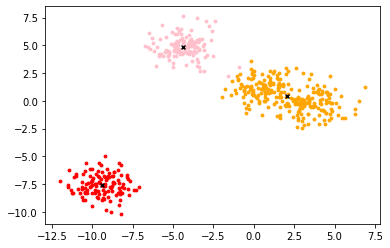

In [6]:



#cLuster_centers_，查看质心
centroid = cluster.cluster_centers_
centroid

centroid.shape

#属性inertia_，总距离平方和
inertia = cluster.inertia_
inertia

color = ["red","pink","orange","gray"]

fig, ax1 = plt.subplots(1)

for i in range(n_clusters):
    ax1.scatter(X[y_pred==i, 0], X[y_pred==i, 1]
            ,marker='o' #点的形状
            ,s=8 #点的大小
            ,c=color[i]
           )
    
ax1.scatter(centroid[:,0],centroid[:,1]
           ,marker="x"
           ,s=15
           ,c="black")
plt.show()






In [7]:

#如果改变簇数，Inertia会怎么样？
n_clusters = 4
cluster_ = KMeans(n_clusters=n_clusters, random_state=0).fit(X)
inertia_ = cluster_.inertia_
inertia_

n_clusters = 5
cluster_ = KMeans(n_clusters=n_clusters, random_state=0).fit(X)
inertia_ = cluster_.inertia_
inertia_

n_clusters = 6
cluster_ = KMeans(n_clusters=n_clusters, random_state=0).fit(X)
inertia_ = cluster_.inertia_
inertia_

n_clusters = 7
cluster_ = KMeans(n_clusters=n_clusters, random_state=0).fit(X)
inertia_ = cluster_.inertia_
inertia_


677.1955204849456

In [8]:




from sklearn.metrics import silhouette_score    #所有样本轮廓系数的均值
from sklearn.metrics import silhouette_samples  #每个样本自己的轮廓系数

X
y_pred

silhouette_score(X,y_pred)

silhouette_score(X,cluster_.labels_)

silhouette_samples(X,y_pred)

silhouette_samples(X,y_pred).mean()             #看看取均值是否和silhouette_score一样







0.7258964564875646

In [9]:


import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm #colormap

for n_clusters in [2,3,4,5,6,7]:
    clusterer = KMeans(n_clusters, random_state=0).fit(X)
    cluster_labels = clusterer.labels_
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    

        

For n_clusters = 2 The average silhouette_score is : 0.6997137884866472
For n_clusters = 3 The average silhouette_score is : 0.7258964564875646
For n_clusters = 4 The average silhouette_score is : 0.6543456306343198
For n_clusters = 5 The average silhouette_score is : 0.5902328468770135
For n_clusters = 6 The average silhouette_score is : 0.45393158293309194
For n_clusters = 7 The average silhouette_score is : 0.42583761272238324


For n_clusters = 2 The average silhouette_score is : 0.6997137884866472


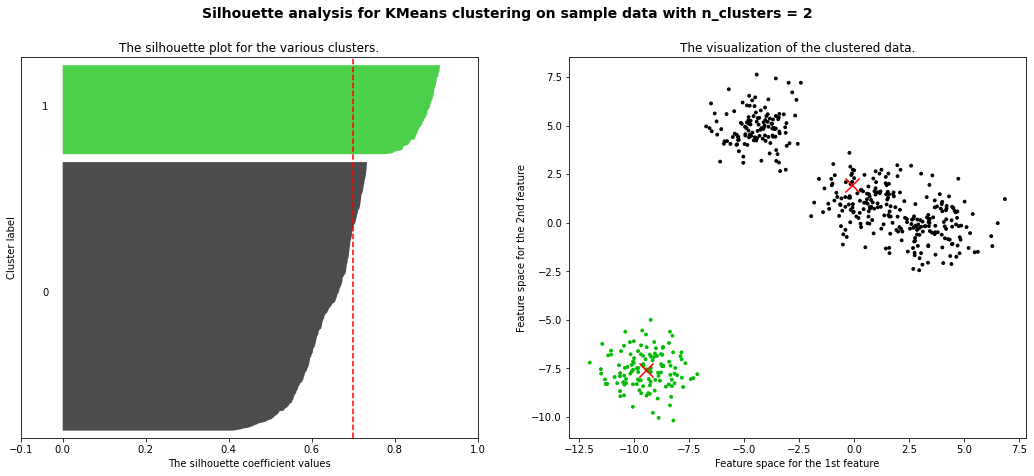

For n_clusters = 3 The average silhouette_score is : 0.7258964564875646


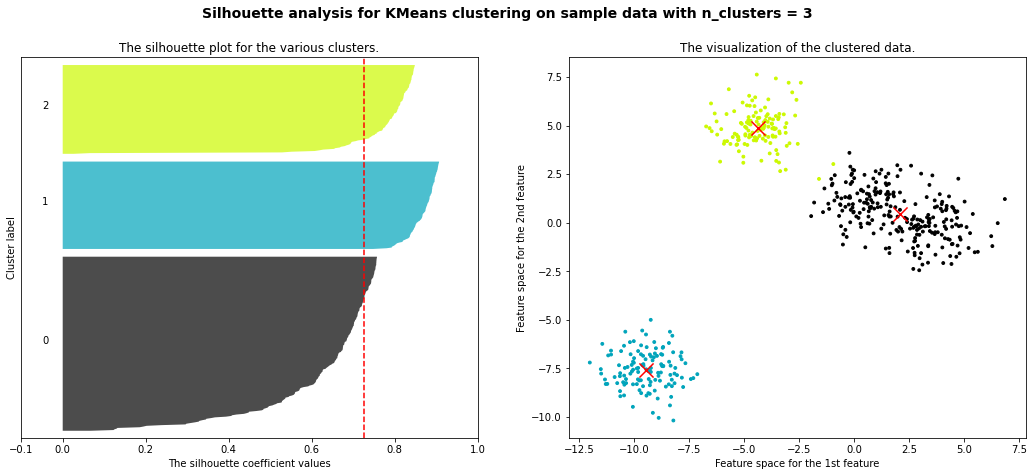

For n_clusters = 4 The average silhouette_score is : 0.6543456306343198


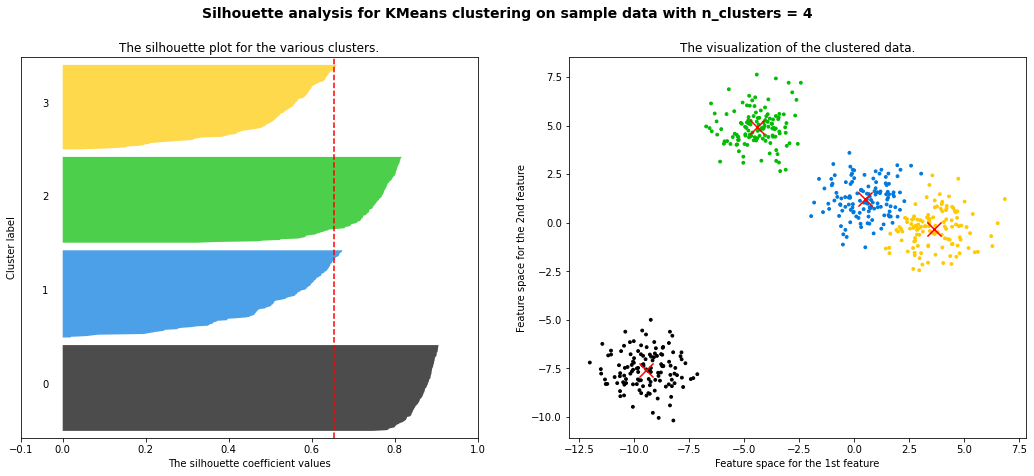

For n_clusters = 5 The average silhouette_score is : 0.5916455801359043


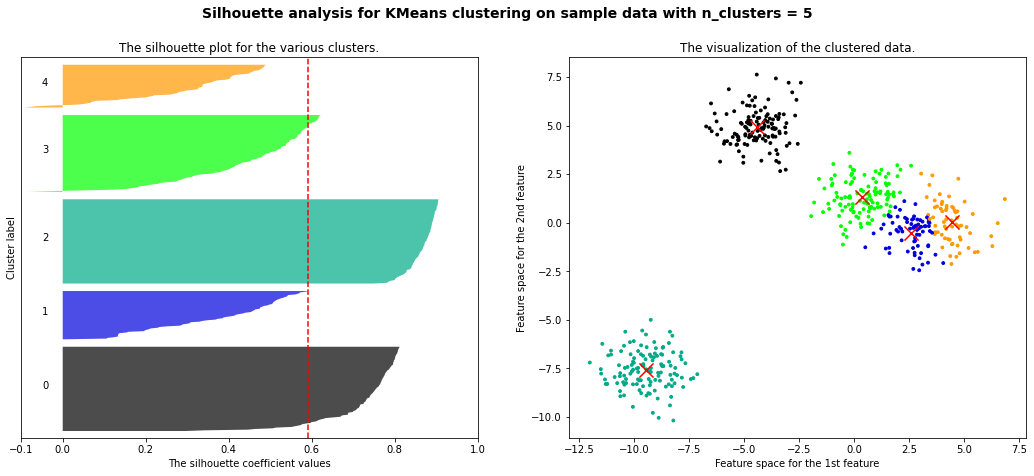

For n_clusters = 6 The average silhouette_score is : 0.4550623542191723


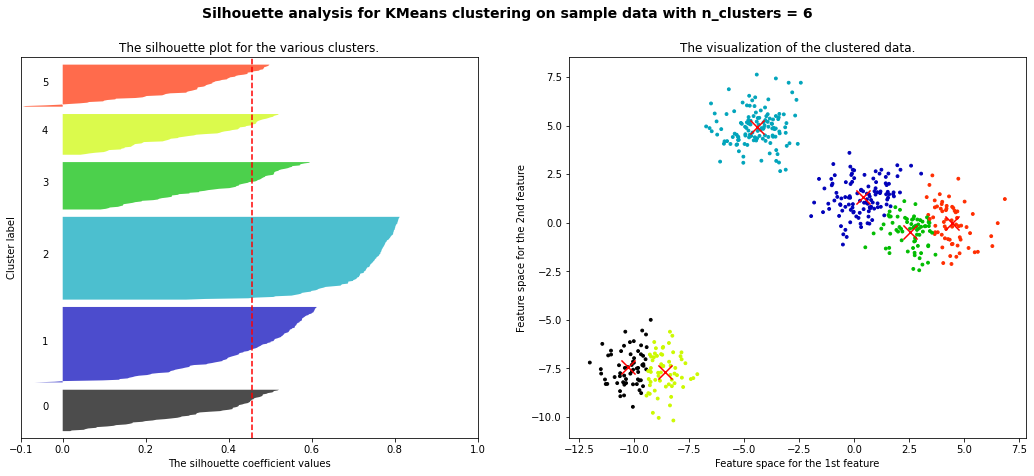

For n_clusters = 7 The average silhouette_score is : 0.4648035605398726


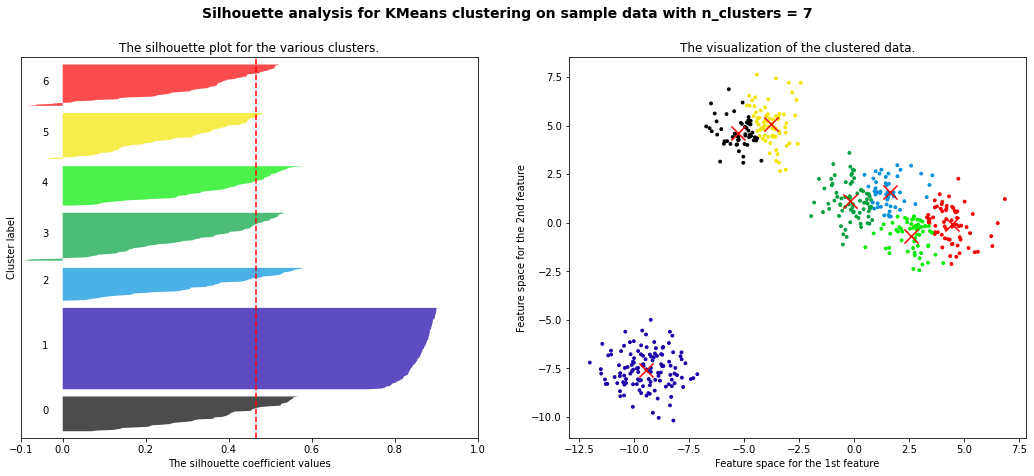

In [10]:


from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

for n_clusters in [2,3,4,5,6,7]:
    n_clusters = n_clusters
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, X.shape[0] + (n_clusters + 1) * 10])
    clusterer = KMeans(n_clusters=n_clusters, random_state=10).fit(X)
    cluster_labels = clusterer.labels_
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i)/n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper)
                          ,ith_cluster_silhouette_values
                          ,facecolor=color
                          ,alpha=0.7
                         )
        ax1.text(-0.05
                 , y_lower + 0.5 * size_cluster_i
                 , str(i))
        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1]
                ,marker='o'
                ,s=8
                ,c=colors
               )
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='x',
                c="red", alpha=1, s=200)
    
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    plt.show()

In [11]:
X

array([[-9.23827241e+00, -8.20366969e+00],
       [-9.22739486e+00, -7.68856809e+00],
       [-3.67550909e+00,  5.31349515e+00],
       [-7.40926641e+00, -8.05469598e+00],
       [-4.01358135e+00,  4.21206806e+00],
       [ 1.93284287e+00, -3.77780867e-01],
       [-3.88473429e+00,  4.93954584e+00],
       [ 4.43479585e+00, -2.12903843e+00],
       [ 3.25705427e+00, -1.82772936e-01],
       [ 4.64294520e+00, -9.53993969e-02],
       [-4.41479639e+00,  5.20476238e+00],
       [ 3.43660765e+00, -1.25871575e-02],
       [ 3.22199840e+00, -1.88121389e-01],
       [-1.04444495e+01, -8.89782856e+00],
       [ 3.99103504e+00,  9.55591608e-01],
       [ 3.60245915e+00,  2.72287989e-01],
       [ 1.98658064e+00,  3.09339163e-01],
       [-5.90588723e+00,  4.06343616e+00],
       [-6.32442669e+00,  5.62168610e+00],
       [-4.19970552e+00,  4.86645429e+00],
       [ 3.01521098e+00,  1.29839699e-01],
       [ 6.77438501e-01,  5.84831700e-01],
       [ 6.60043845e-01,  1.86338442e+00],
       [ 1.

In [12]:
y

array([0, 0, 3, 0, 3, 2, 3, 2, 2, 2, 3, 2, 2, 0, 2, 2, 1, 3, 3, 3, 2, 1,
       1, 1, 3, 1, 1, 1, 0, 1, 2, 2, 3, 0, 1, 3, 0, 3, 2, 2, 0, 2, 3, 3,
       2, 3, 1, 1, 2, 1, 1, 1, 0, 3, 0, 3, 3, 1, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 0, 1, 2, 1, 0, 3, 1, 2, 1, 0, 2, 3, 0, 2, 0, 0, 2, 3, 0, 0, 2,
       0, 3, 3, 1, 2, 3, 3, 0, 0, 2, 0, 0, 0, 2, 0, 1, 0, 2, 1, 0, 1, 1,
       0, 3, 0, 3, 2, 0, 2, 2, 0, 3, 3, 3, 1, 3, 0, 0, 3, 1, 3, 0, 2, 0,
       0, 1, 1, 1, 0, 1, 3, 1, 2, 1, 3, 0, 3, 2, 3, 1, 3, 0, 0, 2, 2, 1,
       1, 1, 0, 1, 3, 3, 2, 3, 2, 1, 1, 2, 0, 1, 1, 0, 1, 3, 2, 0, 0, 1,
       0, 2, 1, 3, 1, 3, 2, 2, 1, 3, 2, 2, 1, 1, 3, 2, 2, 2, 1, 1, 3, 0,
       3, 3, 2, 1, 2, 0, 3, 1, 2, 0, 2, 3, 1, 3, 3, 3, 2, 0, 1, 0, 0, 1,
       0, 2, 1, 2, 1, 0, 1, 0, 2, 2, 1, 1, 1, 2, 1, 3, 0, 3, 2, 1, 3, 3,
       0, 0, 3, 3, 3, 2, 2, 3, 3, 1, 2, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 2,
       3, 1, 3, 3, 3, 0, 2, 1, 2, 0, 3, 0, 1, 2, 3, 3, 2, 2, 1, 2, 2, 3,
       3, 2, 2, 1, 2, 2, 0, 1, 0, 1, 3, 1, 3, 2, 1,

In [13]:
plus = KMeans(n_clusters = 10).fit(X)
plus.n_iter_

7

In [14]:
random = KMeans(n_clusters = 10,init="random",random_state=1912).fit(X)
random.n_iter_

15

In [15]:
random = KMeans(n_clusters = 10,init="random",max_iter=10,random_state=1912).fit(X)
y_pred_max10 = random.labels_
silhouette_score(X,y_pred_max10)

0.32956554498857427

In [16]:
random = KMeans(n_clusters = 10,init="random",max_iter=20,random_state=1912).fit(X)
y_pred_max20 = random.labels_
silhouette_score(X,y_pred_max20)

0.3346200033099384